In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [42]:
import cv2
import os

path_folder1 = 'C:/Users/aksha/eyes/femaleeyes'
label_folder1 = 'femaleeyes'
path_folder2 = 'C:/Users/aksha/eyes/maleeyes'
label_folder2 = 'maleeyes'

In [43]:
image_paths = []
labels = []

In [44]:
for filename in os.listdir(path_folder1):
    if filename.endswith('.jpg'):
        image_paths.append(os.path.join(path_folder1, filename))
        labels.append(label_folder1)

for filename in os.listdir(path_folder2):
    if filename.endswith('.jpg'):
        image_paths.append(os.path.join(path_folder2, filename))
        labels.append(label_folder2)

In [45]:
data_eyes = pd.DataFrame({'image_path': image_paths, 'label': labels})

In [46]:
data_eyes.head()

,image_path,label
0,C:/Users/aksha/eyes/femaleeyes\1.jpg,femaleeyes
1,C:/Users/aksha/eyes/femaleeyes\10.jpg,femaleeyes
2,C:/Users/aksha/eyes/femaleeyes\100.jpg,femaleeyes
3,C:/Users/aksha/eyes/femaleeyes\1000.jpg,femaleeyes
4,C:/Users/aksha/eyes/femaleeyes\1001.jpg,femaleeyes


# **EDA**

In [47]:
# Check for missing values
print(data_eyes.isnull().sum())


image_path    0
label         0
dtype: int64


In [48]:
print(data_eyes.columns)

Index(['image_path', 'label'], dtype='object')


<AxesSubplot:xlabel='label', ylabel='count'>

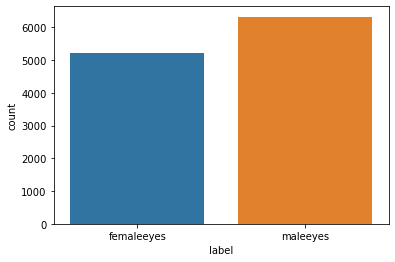

In [49]:
# Plot the distribution of the target variable
import seaborn as sns
sns.countplot(x='label', data=data_eyes)

### **Data is imbalanced**

In [50]:
#Balancing Data
male = data_eyes[data_eyes.label=='maleeyes']
female = data_eyes[data_eyes.label=='femaleeyes']

In [51]:
from sklearn.utils import resample, shuffle
major_samples = resample(male, replace=False, n_samples=5192, random_state=42)

In [52]:
data_eyes = pd.concat([major_samples, female])
data_eyes = shuffle(data_eyes)
data_eyes = data_eyes.reset_index(drop=True)

<AxesSubplot:xlabel='label', ylabel='count'>

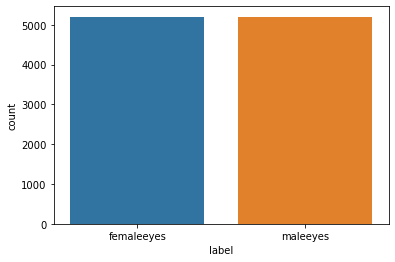

In [53]:
import seaborn as sns
sns.countplot(x='label', data=data_eyes)

### **Now we can see data is balanced**

## **Some Data Visualization**

In [54]:
female_img = cv2.imread(data_eyes[data_eyes['label'] == 'femaleeyes'].head(1)['image_path'].values[0])
male_img = cv2.imread(data_eyes[data_eyes['label'] == 'maleeyes'].head(1)['image_path'].values[0])

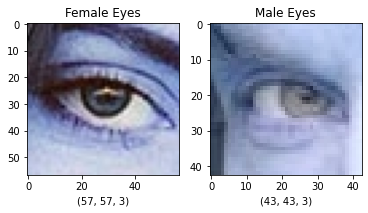

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
ax1.imshow(female_img)
ax1.set_xlabel(female_img.shape)
ax1.set_title('Female Eyes')
ax2.imshow(male_img)
ax2.set_xlabel(male_img.shape)
ax2.set_title('Male Eyes')

plt.show()

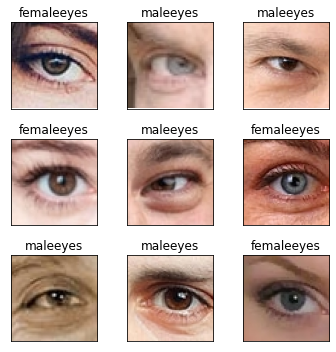

In [56]:
# some random images
fig, axes = plt.subplots(nrows = 3,
                        ncols = 3,
                        figsize = (5, 5),
                        subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data_eyes["image_path"][i]))
    ax.set_title(data_eyes["label"][i])
plt.tight_layout()
plt.show()

In [57]:
# image size
female_eye_size = plt.imread(data_eyes["image_path"][data_eyes[data_eyes['label'] == 'femaleeyes'].index[0]])
print(female_eye_size.shape, '-->',  data_eyes['label'][data_eyes[data_eyes['label'] == 'femaleeyes'].index[0]])

male_eye_size = plt.imread(data_eyes["image_path"][data_eyes[data_eyes['label'] == 'maleeyes'].index[0]])
print(male_eye_size.shape, '-->',  data_eyes['label'][data_eyes[data_eyes['label'] == 'maleeyes'].index[0]])

(57, 57, 3) --> femaleeyes
(43, 43, 3) --> maleeyes


### **Resize image**

In [58]:
resized_df = data_eyes.copy()

In [59]:
from PIL import Image
import numpy as np

def preprocess_image(img_path):
    with Image.open(img_path) as img:
        # Convert to grayscale
        img = img.convert('L')

        # Resize
        img = img.resize((100, 100))

        # Convert to numpy array and add channel dimension
        img = np.array(img).reshape((100, 100, 1))

        # Normalize pixel values to be between 0 and 1
        img = img.astype(np.float32) / 255.0

    return img


In [60]:
X = []
y = []

for i, row in resized_df.iterrows():
    img_path = row['image_path']
    label = row['label']
    
    img = preprocess_image(img_path)
    
    X.append(img)
    y.append(label)

X = np.array(X)
y = np.array(y)


In [61]:
#Printing X
X

array([[[[0.19215687],
         [0.2627451 ],
         [0.38039216],
         ...,
         [0.8509804 ],
         [0.8627451 ],
         [0.8666667 ]],

        [[0.21176471],
         [0.27450982],
         [0.37254903],
         ...,
         [0.84705883],
         [0.85882354],
         [0.8627451 ]],

        [[0.2509804 ],
         [0.29411766],
         [0.34509805],
         ...,
         [0.8392157 ],
         [0.84705883],
         [0.8509804 ]],

        ...,

        [[0.8117647 ],
         [0.8156863 ],
         [0.8235294 ],
         ...,
         [0.8       ],
         [0.79607844],
         [0.79607844]],

        [[0.80784315],
         [0.8117647 ],
         [0.81960785],
         ...,
         [0.8156863 ],
         [0.80784315],
         [0.80784315]],

        [[0.80784315],
         [0.80784315],
         [0.8156863 ],
         ...,
         [0.8235294 ],
         [0.8156863 ],
         [0.8117647 ]]],


       [[[0.3137255 ],
         [0.3254902 ],
         [0.35

# **Model 1**

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report



In [64]:
svm_clf = SVC()
svm_clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
svm_pred = svm_clf.predict(X_test.reshape(X_test.shape[0], -1))
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

  femaleeyes       0.86      0.86      0.86      1011
    maleeyes       0.87      0.87      0.87      1068

    accuracy                           0.87      2079
   macro avg       0.87      0.87      0.87      2079
weighted avg       0.87      0.87      0.87      2079



In [65]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
knn_pred = knn_clf.predict(X_test.reshape(X_test.shape[0], -1))
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

  femaleeyes       0.86      0.78      0.82      1011
    maleeyes       0.81      0.88      0.84      1068

    accuracy                           0.83      2079
   macro avg       0.83      0.83      0.83      2079
weighted avg       0.83      0.83      0.83      2079



# **Model 2**

In [71]:
size = (64,64)
df = data_eyes.copy()

size_list = set()
for i in range(len(df)):
    image=cv2.imread(data_eyes['image_path'][i])
    image=cv2.resize(image,size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    size_list.add(image.shape)
    df['image_path'][i] = image.flatten()  
    
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df['label'] = np.asarray(LE.fit_transform(df.label))

In [72]:
import tensorflow as tf
from tensorflow import keras
def cleaned(X):
    for i in range(len(X)):
        X[i] = np.vstack(X[i].reset_index(drop=True))
    return X

In [74]:
# Define the MLP model
def create_mlp_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [77]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(df.image_path, df.label, test_size = 0.4, random_state = 7)
X_val2, X_test2,y_val2, y_test2 = train_test_split(X_val2, y_val2, test_size = 0.5, random_state = 7)

x_train2, x_val2, x_test2, y_train2, y_val2, y_test2 = cleaned([X_train2, X_val2, X_test2, y_train2, y_val2, y_test2])

print("X_Train: ", x_train2.shape) 
print("X_Val: ", x_val2.shape) 
print("X_Test: ", x_test2.shape) 
print("y_Train: ", y_train2.shape) 
print("y_Val: ", y_val2.shape) 
print("y_test: ", y_test2.shape) 

X_Train:  (6236, 12288)
X_Val:  (2079, 12288)
X_Test:  (2079, 12288)
y_Train:  (6236, 1)
y_Val:  (2079, 1)
y_test:  (2079, 1)


In [78]:
MLP = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [79]:
male = len(y_train2[y_train2>0])
female = len(y_train2) - male
total = len(y_train2)
weight_for_male = total / (2 * male) 
weight_for_female = total / (2 * female)
class_weight = {0: weight_for_female, 1: weight_for_male}
print(class_weight)

# Optimizer
adam_optimizer = tf.keras.optimizers.Adam()

{0: 0.9964844998402045, 1: 1.0035403926617317}


In [80]:
MLP.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=[
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
    ]
)

- It has three dense layers with leaky ReLU activation functions
- The output layer has a sigmoid activation function to produce binary predictions
- Dropout layers are used to help prevent overfitting
- The model is optimized using the Adam optimizer
- The model is evaluated using several commonly used binary classification metrics, including accuracy, precision, recall, and AUC.

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train2)
mlp_history = MLP.fit(x_train_scaled, y_train2, class_weight=class_weight, batch_size=64, validation_data=(x_val2,y_val2), epochs=20)

Epoch 1/20
98/98 [==============================] - 24s 218ms/step - loss: 7.2886 - tp: 2220.0000 - fp: 916.0000 - tn: 2213.0000 - fn: 887.0000 - accuracy: 0.7109 - precision: 0.7079 - recall: 0.7145 - auc: 0.7313 - val_loss: 728.5451 - val_tp: 1054.0000 - val_fp: 946.0000 - val_tn: 74.0000 - val_fn: 5.0000 - val_accuracy: 0.5426 - val_precision: 0.5270 - val_recall: 0.9953 - val_auc: 0.5344
Epoch 2/20
98/98 [==============================] - 21s 212ms/step - loss: 3.7904 - tp: 2441.0000 - fp: 692.0000 - tn: 2437.0000 - fn: 666.0000 - accuracy: 0.7822 - precision: 0.7791 - recall: 0.7856 - auc: 0.8084 - val_loss: 206.3391 - val_tp: 273.0000 - val_fp: 10.0000 - val_tn: 1010.0000 - val_fn: 786.0000 - val_accuracy: 0.6171 - val_precision: 0.9647 - val_recall: 0.2578 - val_auc: 0.6249
Epoch 3/20
98/98 [==============================] - 21s 211ms/step - loss: 2.3065 - tp: 2495.0000 - fp: 658.0000 - tn: 2471.0000 - fn: 612.0000 - accuracy: 0.7963 - precision: 0.7913 - recall: 0.8030 - auc: 0

In [83]:
import numpy as np

# Scale the test data using the trained scaler
x_test_scaled = scaler.transform(x_test2)

# Make predictions on the scaled test data
y_pred = MLP.predict(x_test_scaled)

# Calculate the test loss and accuracy
test_loss = np.mean(np.square(y_pred - y_test2))
test_acc = np.mean((y_pred.round() == y_test2))

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


65/65 [==============================] - 1s 10ms/step
Test loss: 0.08314190607479051
Test accuracy: 0.8850408850408851


In [85]:
y_pred2 = MLP.predict(x_test_scaled)
y_pred2 = np.where(y_pred2 > 0.5, 1, 0)
y_pred2

65/65 [==============================] - 1s 10ms/step


array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

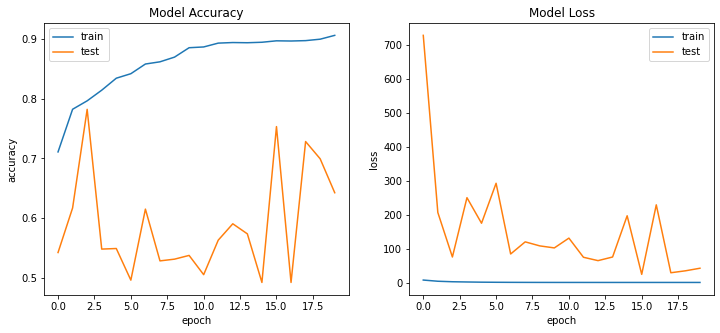

In [86]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(mlp_history.history['accuracy'], label='train')
plt.plot(mlp_history.history['val_accuracy'], label='test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Model Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(122)
plt.plot(mlp_history.history['loss'], label='train')
plt.plot(mlp_history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Model Loss')
plt.legend()

plt.show()


- The model's performance is improving, with decreasing loss and increasing accuracy and recall, but low precision suggests room for improvement. Fluctuations in validation metrics indicate potential overfitting.

In [87]:
from sklearn.metrics import classification_report
MLP_Classification_Report = classification_report(y_test2,y_pred2)
print(MLP_Classification_Report)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1053
           1       0.89      0.87      0.88      1026

    accuracy                           0.88      2079
   macro avg       0.88      0.88      0.88      2079
weighted avg       0.88      0.88      0.88      2079



# **Model 3**

In [88]:
def to_tensor(_list):
    return [tf.convert_to_tensor(item) for item in _list]


In [89]:
def cleaned2(X):
    for i in range(len(X)):
        X[i] = np.stack(X[i].reset_index(drop=True))
    return X

In [93]:
size = (64,64)
df2 = data_eyes.copy()

for i in range(len(data_eyes)):
    image=cv2.imread(data_eyes['image_path'][i])
    image=cv2.resize(image,size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    df2['image_path'][i] = image
    
# Convert labels to numeric values

LE = LabelEncoder()

df2['label'] = np.asarray(LE.fit_transform(df2.label))

In [94]:
x_train3, x_val3, y_train3, y_val3 = train_test_split(df3.image_path, df3.label, test_size = 0.4, random_state = 7)
x_val3, x_test3, y_val3, y_test3 = train_test_split(x_val3, y_val3, test_size = 0.5, random_state = 7)

x_train3, x_val3, x_test3, y_train3, y_val3, y_test3 = cleaned2([x_train3, x_val3, x_test3, y_train3, y_val3, y_test3])
x_train3, x_val3, x_test3, y_train3, y_val3, y_test3 = to_tensor([x_train3, x_val3, x_test3, y_train3, y_val3, y_test3])

print("X Train: ", x_train3.shape) 
print("X Val: ", x_val3.shape) 
print("X Test: ", x_test3.shape) 
print("y Train: ", y_train3.shape) 
print("y Val: ", y_val3.shape) 
print("y test: ", y_test3.shape) 

X Train:  (6236, 64, 64, 3)
X Val:  (2079, 64, 64, 3)
X Test:  (2079, 64, 64, 3)
y Train:  (6236,)
y Val:  (2079,)
y test:  (2079,)


In [99]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the CNN model
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(units=1, activation='sigmoid'))

cnn_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Fit the CNN model
history_cnn = cnn_model.fit(x_train3, y_train3, epochs=20, validation_data=(x_val3, y_val3), callbacks=[early_stop])

Epoch 1/20
195/195 [==============================] - 21s 104ms/step - loss: 1.0982 - accuracy: 0.6998 - val_loss: 0.4367 - val_accuracy: 0.8086
Epoch 2/20
195/195 [==============================] - 20s 100ms/step - loss: 0.4000 - accuracy: 0.8281 - val_loss: 0.3602 - val_accuracy: 0.8446
Epoch 3/20
195/195 [==============================] - 20s 101ms/step - loss: 0.3267 - accuracy: 0.8634 - val_loss: 0.3203 - val_accuracy: 0.8658
Epoch 4/20
195/195 [==============================] - 20s 102ms/step - loss: 0.3272 - accuracy: 0.8611 - val_loss: 0.3379 - val_accuracy: 0.8639
Epoch 5/20
195/195 [==============================] - 20s 104ms/step - loss: 0.3019 - accuracy: 0.8720 - val_loss: 0.2787 - val_accuracy: 0.8899
Epoch 6/20
195/195 [==============================] - 20s 102ms/step - loss: 0.2667 - accuracy: 0.8938 - val_loss: 0.2870 - val_accuracy: 0.8903
Epoch 7/20
195/195 [==============================] - 20s 102ms/step - loss: 0.2507 - accuracy: 0.8954 - val_loss: 0.2835 - val_ac

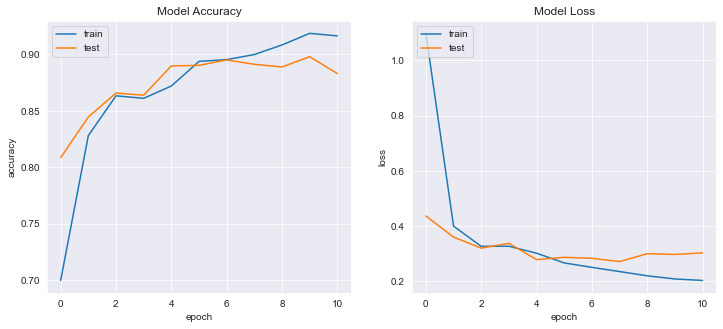

In [103]:
import seaborn as sns

# Convert history to DataFrame
history_df = pd.DataFrame(history_cnn.history)

# Plot accuracy and loss
sns.set_style('darkgrid')
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
sns.lineplot(x=history_df.index, y='accuracy', data=history_df, ax=axs[0], label='train')
sns.lineplot(x=history_df.index, y='val_accuracy', data=history_df, ax=axs[0], label='test')
axs[0].set(xlabel='epoch', ylabel='accuracy', title='Model Accuracy')
axs[0].legend(loc='upper left')
sns.lineplot(x=history_df.index, y='loss', data=history_df, ax=axs[1], label='train')
sns.lineplot(x=history_df.index, y='val_loss', data=history_df, ax=axs[1], label='test')
axs[1].set(xlabel='epoch', ylabel='loss', title='Model Loss')
axs[1].legend(loc='upper left')
plt.show()


- We can see that the model's training and validation accuracy are both increasing over the epochs, indicating that the model is learning to classify the images more accurately.

In [104]:
y_pred3 = cnn_model.predict(x_test3)
y_pred3 = np.where(y_pred3 > 0.5, 1, 0)
y_pred3

65/65 [==============================] - 1s 21ms/step


array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [105]:
cnn_Classification_Report = classification_report(y_test3,y_pred3)
print(cnn_Classification_Report)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1053
           1       0.94      0.82      0.87      1026

    accuracy                           0.88      2079
   macro avg       0.89      0.88      0.88      2079
weighted avg       0.89      0.88      0.88      2079



- The model's precision and recall for class 0 are 0.84 and 0.94, and for class 1, they are 0.94 and 0.82. The F1-score for both classes is 0.89, and the overall accuracy is 0.88, indicating good performance.

#### Comparison of the performance of the 3 models

Based on the classification reports:-
- According to the classification reports, Model 4 demonstrates superior performance compared to the other three models in terms of precision, recall, and F1-score for both classes, exhibiting the highest values for all evaluation metrics. Model 3 also shows high precision, recall, and F1-score, but with slightly lower values than those of Model 4. Model 1 displays a similar F1-score to Model 4, but its precision and recall are lower than those of Model 4. Model 2 exhibits the lowest F1-score among the four models and presents lower precision and recall compared to Model 4 and Model 3. Overall, Model 4 is the best choice when selecting the optimal model based on the provided evaluation metrics, followed by Model 3.

#### Conclusion

Throughout this project, I developed four models for gender classification utilizing SVM, KNN, MLP, and CNN. I conducted EDA, preprocessed the data, and implemented techniques such as regularization, dropout, and early stopping. The models were evaluated based on their accuracy, precision, and recall. The analysis suggests that all three models perform similarly, achieving an overall accuracy of approximately 88%.